In [1]:
import os
import pandas as pd
import numpy as np
os.chdir("C:\\Users\\user\\Desktop\\ESAA(Ewha Statistics Analysis Association)_이화통계분석학회_YB_2020-2\\YouTube")
# 일관된 출력을 위해 유사난수 초기화

np.random.seed(42)
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import tensorflow
import seaborn as sn
sn.set()
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
# matplotlib.rc('font', family='AppleGothic')  # MacOS
matplotlib.rc('font', family='Malgun Gothic')  # Windows
plt.rcParams['axes.unicode_minus'] = False

In [2]:
usvideos = pd.read_csv('USvideos.csv')

In [3]:
usvideos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [4]:
filter = (usvideos['comments_disabled'] == 'False') & (usvideos['ratings_disabled'] == 'False') & (usvideos['video_error_or_removed'] == 'False')
us_new = usvideos.loc[filter]

C:\Users\user\.conda\envs\test\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
C:\Users\user\.conda\envs\test\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
C:\Users\user\.conda\envs\test\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


In [5]:
Q1 = us_new['views'].quantile(0.25)
Q3 = us_new['views'].quantile(0.75)
IQR = Q3 - Q1

In [6]:
filter = (us_new['views'] <= Q3 + 1.5 *IQR) & (us_new['likes'] <= 550000) & (us_new['dislikes'] <= 10000) & (us_new['comment_count'] <= 15000)
filter2 = (us_new['views'] >0) & (us_new['likes'] >0) & (us_new['dislikes'] >0) & (us_new['comment_count'] >0)
my_us = us_new.loc[filter]
my_us = my_us.loc[filter2]

print("original size : ",len(us_new.iloc[:,]))
print("new size : ",len(my_us.iloc[:,]))

original size :  0
new size :  0


In [28]:
string=usvideos['title']
lower = []
upper = []
upper_rate = []
for j in range(len(string)):
    count1=0
    count2=0
    for i in string[j]:
        if(i.islower()):
            count1 += 1
        elif(i.isupper()):
            count2 += 1

    lower.append(count1)
    upper.append(count2)
    temp = (count2+1) / (count1+count2+1)
    upper_rate.append(temp)

In [10]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(usvideos, test_size=0.2, random_state=42)
print(len(train_set), "train +", len(test_set), "test")

32759 train + 8190 test


In [40]:
usvideos["upper_rate"]=upper_rate

In [37]:
corr_matrix = usvideos.corr()
corr_matrix["views"].sort_values(ascending=False)

views                     1.000000
likes                     0.849177
comment_count             0.617621
dislikes                  0.472213
ratings_disabled          0.015355
comments_disabled         0.002677
video_error_or_removed   -0.002256
category_id              -0.168231
Name: views, dtype: float64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='views', ylabel='upper_rate'>

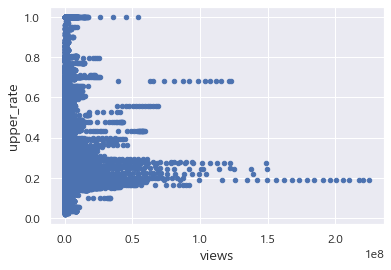

In [41]:
from pandas.plotting import scatter_matrix

usvideos.plot(kind="scatter", x="views", y="upper_rate")

In [45]:
usvideos['likes/views'] = usvideos['likes']/usvideos['views']
usvideos['dislikes/views'] = usvideos['dislikes']/usvideos['views']
usvideos['comments/views'] = usvideos['comment_count']/usvideos['views']

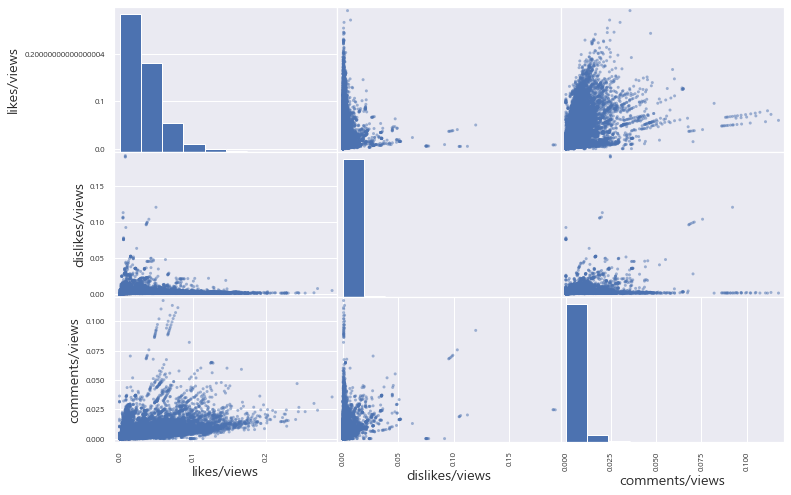

In [46]:
from pandas.plotting import scatter_matrix

attributes = ['likes/views', 'dislikes/views', 'comments/views']
scatter_matrix(usvideos[attributes], figsize=(12, 8));

In [47]:
corr_matrix = usvideos.corr()
corr_matrix["comments/views"].sort_values(ascending=False)

comments/views            1.000000
likes/views               0.427980
dislikes/views            0.284316
comment_count             0.247241
upper_rate                0.167733
dislikes                  0.089142
category_id               0.080174
likes                     0.070496
video_error_or_removed   -0.001944
ratings_disabled         -0.029261
views                    -0.048708
comments_disabled        -0.097271
Name: comments/views, dtype: float64